### Imports

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, regularizers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Mounting drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Loading the data

In [ ]:
x_path = '/content/drive/MyDrive/Assignment_1/x_digits.npy'
y_path = '/content/drive/MyDrive/Assignment_1/y_digits.npy'

X = np.load(x_path)
Y = np.load(y_path)


### Sanity Check

In [ ]:
print("Shape of X:", X.shape)
print("Data type of X:", X.dtype)
print("Shape of Y:", Y.shape)
print("Data type of Y:", Y.dtype)

Shape of X: (35631, 129, 71)
Data type of X: float64
Shape of Y: (35631,)
Data type of Y: float64


### Looking at an example of an image.

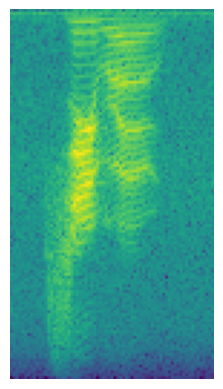

In [ ]:
plt.imshow(X[0])
plt.axis("off")
plt.show()

### Splitting the dataset into Train (60%), Test (20%) and Validation (20%)





In [ ]:
# split into 60% train and 40% (test + validation)
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.4, random_state=42, stratify=Y)

# split the remaining 40% into 20% test and 20% validation
X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42, stratify=Y_temp)

# sanity check
print("Train Set: ", X_train.shape, Y_train.shape)
print("Test Set: ", X_test.shape, Y_test.shape)
print("Validation Set: ", X_val.shape, Y_val.shape)


Train Set:  (21378, 129, 71) (21378,)
Test Set:  (7126, 129, 71) (7126,)
Validation Set:  (7127, 129, 71) (7127,)


### Helper functions


# Fully Connected Neural Network

### Building and fitting the model.

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = [129, 71]))
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(256, activation="selu", kernel_initializer="lecun_normal",kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(128, activation="selu", kernel_initializer="lecun_normal",kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(64, activation="selu", kernel_initializer="lecun_normal",kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(32, activation="selu", kernel_initializer="lecun_normal",kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(16, activation="selu", kernel_initializer="lecun_normal",kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(10, activation = "softmax"))

adamW_optimizer = tf.keras.optimizers.AdamW(learning_rate = 0.001, weight_decay= 0.002) #use_ema=True, ema_momentum=0.99 best weight_decay 0.002
nadam_optimizer = tf.keras.optimizers.AdamW(learning_rate = 0.001) #use_ema=True, ema_momentum=0.99 best weight_decay 0.002
nag_optmizer = tf.keras.optimizers.SGD(learning_rate = 0.001, nesterov=True, momentum=0.9) #NAG


model.compile(loss = "sparse_categorical_crossentropy", optimizer = nag_optmizer, metrics = ["accuracy"])

learning_rate_scheduler= tf.keras.callbacks.ReduceLROnPlateau(factor = 0.5, patience= 3)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',# or val_accuracy
    patience=5,
    restore_best_weights=True
)
history = model.fit(X_train, Y_train, epochs = 40, validation_data = (X_val, Y_val),callbacks= [early_stopping,learning_rate_scheduler])

Epoch 1/40
669/669 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.1206 - loss: 3.5063 - val_accuracy: 0.2622 - val_loss: 2.4856 - learning_rate: 0.0010
Epoch 2/40
669/669 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2315 - loss: 2.5567 - val_accuracy: 0.3786 - val_loss: 2.1698 - learning_rate: 0.0010
Epoch 3/40
669/669 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3319 - loss: 2.2688 - val_accuracy: 0.4806 - val_loss: 1.8724 - learning_rate: 0.0010
Epoch 4/40
669/669 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4157 - loss: 2.0247 - val_accuracy: 0.5511 - val_loss: 1.6569 - learning_rate: 0.0010
Epoch 5/40
669/669 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4865 - loss: 1.8439 - val_accuracy: 0.5391 - val_loss: 1.7014 - learning_rate: 0.0010
Epoch 6/40
669/669 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5203 - loss: 1.7608 - val_accuracy: 0.6387 - val_loss: 1.4602 - learning_rate: 0.0010
Epoch 7/40
669/669 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5779 - loss: 1.6186 

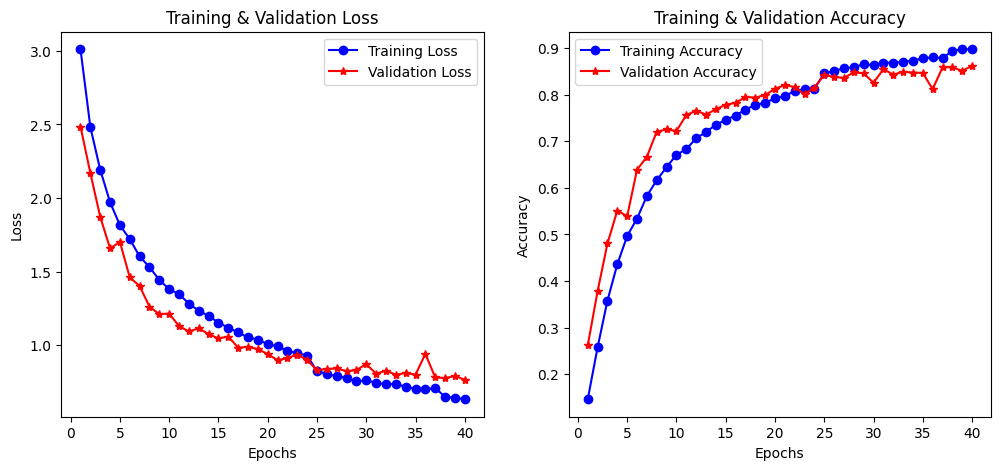

In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy and loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

# Plot Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r*-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.show()


### Loss Difference (Overfitting Indicator)

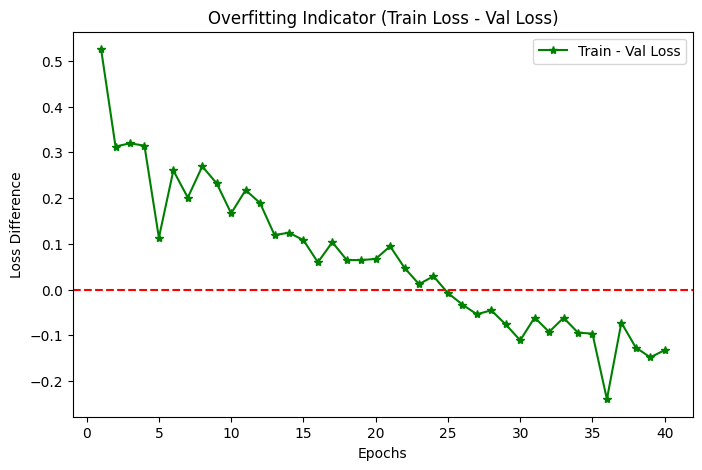

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(epochs, [t - v for t, v in zip(train_loss, val_loss)], 'g*-', label="Train - Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss Difference")
plt.title("Overfitting Indicator (Train Loss - Val Loss)")
plt.axhline(y=0, color='r', linestyle='--')  # Baseline where training and validation loss match
plt.legend()
plt.show()

### Confusion Matrix

223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


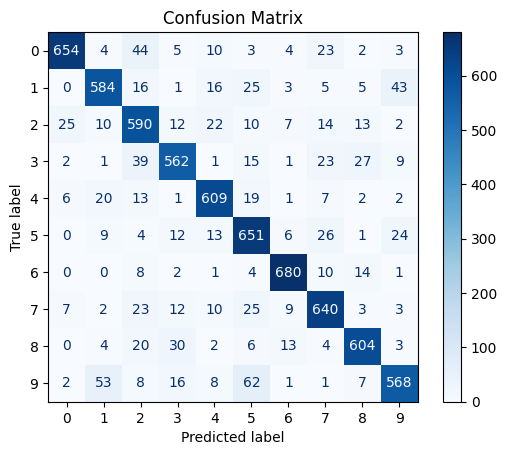

In [ ]:

y_pred = np.argmax(model.predict(X_val), axis=1)
cm = confusion_matrix(Y_val, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Convolutional Neural Network

### Building and fitting the model.

In [ ]:
cnn_model = tf.keras.Sequential()
cnn_model.add(tf.keras.layers.Input(shape=(129, 71, 1)))

cnn_model.add(tf.keras.layers.Conv2D(32, (7,7), activation = "relu", kernel_initializer = "he_normal"))
cnn_model.add(tf.keras.layers.SpatialDropout2D(0.2))
cnn_model.add(tf.keras.layers.Dropout(0.310))

cnn_model.add(tf.keras.layers.Conv2D(64, (5,5), activation = "relu", kernel_initializer = "he_normal"))
cnn_model.add(tf.keras.layers.Dropout(0.235))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))

cnn_model.add(tf.keras.layers.Conv2D(128, (3,3), activation = "relu", kernel_initializer = "he_normal"))
cnn_model.add(tf.keras.layers.Dropout(0.215))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
cnn_model.add(tf.keras.layers.Flatten())

cnn_model.add(tf.keras.layers.Dense(100, activation = "relu", kernel_initializer = "he_normal"))
cnn_model.add(tf.keras.layers.Dropout(0.190))
cnn_model.add(tf.keras.layers.Dense(10, activation = "softmax"))

EarlyStoppingCB = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 5, restore_best_weights = True)
LearningRateCB = tf.keras.callbacks.ReduceLROnPlateau(factor = 0.5, patience = 3)

adamW_optimizer = tf.keras.optimizers.AdamW(learning_rate = 0.001, weight_decay = 0.004)
nadam_optimizer = tf.keras.optimizers.Nadam(learning_rate = 0.001, weight_decay = 0.006)
rmsProp_optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001)


cnn_model.compile(loss = "sparse_categorical_crossentropy", optimizer = nadam_optimizer, metrics = ["accuracy"])
cnn_history = cnn_model.fit(X_train, Y_train, epochs = 40, validation_data = (X_val, Y_val), callbacks = [EarlyStoppingCB, LearningRateCB])

Epoch 1/40
669/669 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.3188 - loss: 13.1441 - val_accuracy: 0.7650 - val_loss: 0.8637 - learning_rate: 0.0010
Epoch 2/40
669/669 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7374 - loss: 0.8028 - val_accuracy: 0.8516 - val_loss: 0.5160 - learning_rate: 0.0010
Epoch 3/40
669/669 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8210 - loss: 0.5645 - val_accuracy: 0.8667 - val_loss: 0.4615 - learning_rate: 0.0010
Epoch 4/40
669/669 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8697 - loss: 0.3969 - val_accuracy: 0.9007 - val_loss: 0.3237 - learning_rate: 0.0010
Epoch 5/40
669/669 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8958 - loss: 0.3224 - val_accuracy: 0.8862 - val_loss: 0.3621 - learning_rate: 0.0010
Epoch 6/40
669/669 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9039 - loss: 0.3025 - val_accuracy: 0.9248 - val_loss: 0.2406 - learning_rate: 0.0010
Epoch 7/40
669/669 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9263 - loss: 0.2290

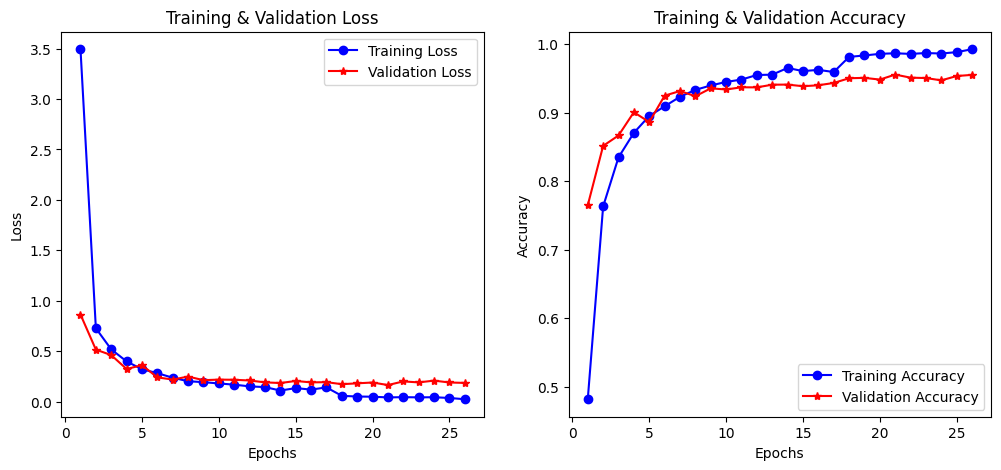

In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy and loss from the history object
cnn_train_loss = cnn_history.history['loss']
cnn_val_loss = cnn_history.history['val_loss']
cnn_train_acc = cnn_history.history['accuracy']
cnn_val_acc = cnn_history.history['val_accuracy']

epochs = range(1, len(cnn_train_loss) + 1)

# Plot Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, cnn_train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, cnn_val_loss, 'r*-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, cnn_train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, cnn_val_acc, 'r*-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.show()


### Loss Difference

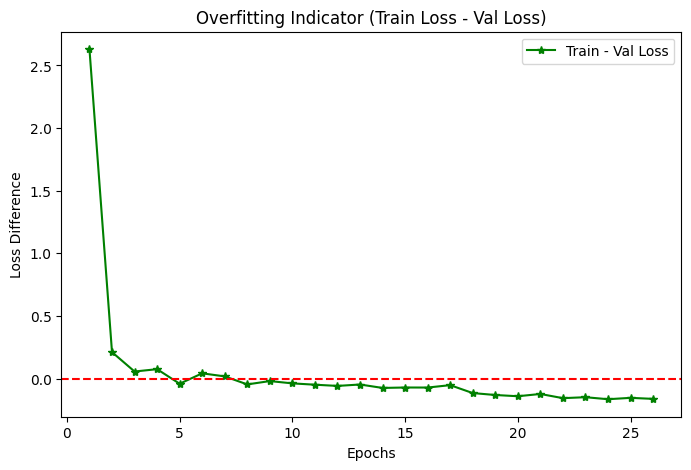

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(epochs, [t - v for t, v in zip(cnn_train_loss, cnn_val_loss)], 'g*-', label="Train - Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss Difference")
plt.title("Overfitting Indicator (Train Loss - Val Loss)")
plt.axhline(y=0, color='r', linestyle='--')  # Baseline where training and validation loss match
plt.legend()
plt.show()

### Confusion Matrix

223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


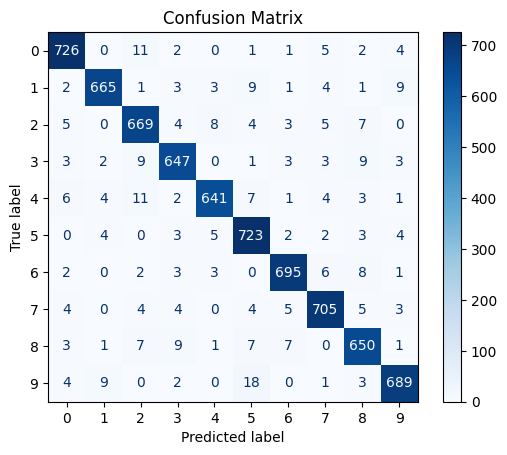

In [ ]:

y_pred = np.argmax(cnn_model.predict(X_val), axis=1)
cm = confusion_matrix(Y_val, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Stats


### Convolutional Neural Network Stats

In [ ]:
print("Loss + accuracy on train: {}".format(cnn_model.evaluate(X_train, Y_train)))
print("Loss + accuracy on valid: {}".format(cnn_model.evaluate(X_val, Y_val)))
print("Loss + accuracy on test: {}".format(cnn_model.evaluate(X_test, Y_test)))

669/669 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9992 - loss: 0.0050
Loss + accuracy on train: [0.005053672473877668, 0.9992983341217041]
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9612 - loss: 0.1432
Loss + accuracy on valid: [0.1549796462059021, 0.958608090877533]
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9605 - loss: 0.1653
Loss + accuracy on test: [0.16357949376106262, 0.9588829874992371]


### Fully Connected Neural Network Stats

In [ ]:
print("Loss + accuracy on train: {}".format(model.evaluate(X_train, Y_train)))
print("Loss + accuracy on valid: {}".format(model.evaluate(X_val, Y_val)))
print("Loss + accuracy on test: {}".format(model.evaluate(X_test, Y_test)))

669/669 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9648 - loss: 0.4251
Loss + accuracy on train: [0.4296432435512543, 0.9618766903877258]
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8662 - loss: 0.7433
Loss + accuracy on valid: [0.7646980881690979, 0.8617931604385376]
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8715 - loss: 0.7203
Loss + accuracy on test: [0.729755699634552, 0.8678080439567566]


# Findings and Comments

During the development of both models, we experimented with various optimizers, activation functions, and hyperparameter tuning strategies to improve performance and reduce overfitting.

We tried out multiple optimizers - **AdamW, NAdam, SGD, RMSprop, and NAG (Nesterov Accelerated Gradient)**. Each optimizer impacted convergence speed and generalization differently. At the end, **AdamW** with weight decay provided a balance between fast convergence and generalization, while **NAG** with momentum showed promising results in stabilizing training.

The **FCNN** model suffered from overfitting and as a result regularization techniques were used such as dropout and L2 regularization (disabled when using adam optimizers) on the dense layers. The network was made deeper and utilized many activation functions until SeLu was decided due to its self-normalization capabilities.

Our **CNN** model was also suffering from overfitting. To prevent that we introduced dropout layers. We adjusted the dropout precentage across the model by 0.0 until we setttled with our current values. We also added a **SpatialDropout2D** layer which is specially designed for Convolutional Neural Networks. Because it kill entire feature maps, we found it to be very punishing to model so we kept it at 0.2. We also tried with deepening the neural network by introducing more layers and using the swish activation function. However, the results weren't much better so we kept it the relu activation. Perhaps, we didn't make the model deep enough.

Both models used early stopping in order to save computation if loss did not improve and learning rate scheduling in order to improve generalization by halving the learning rate if loss does not improve.







